In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Veriyi yükle
train = pd.read_csv("../data/processed/train_cleaned.csv")
print(train.shape)

(891, 24)


In [17]:
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# Sayı isimli kolonları otomatik bul ve ekle
numeric_named_cols = [col for col in train.columns if str(col).isdigit()]

drop_columns = drop_columns + numeric_named_cols

train_model = train.drop(columns=drop_columns)

In [18]:
train_model = pd.get_dummies(train_model,columns = ["Sex","Embarked","Title"] , drop_first = True)

In [19]:
X = train_model.drop("Survived",axis=1)
y = train_model["Survived"]

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")

Train: (712, 14)
Validation: (179, 14)


# Model Eğit

In [29]:
# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
# Tahmin
y_pred_rf = rf_model.predict(X_val)

In [31]:
# Değerlendirme
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

Random Forest Accuracy: 0.8379888268156425

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       105
           1       0.80      0.81      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [32]:
# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
y_pred_lr = lr_model.predict(X_val)

In [34]:
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))

Logistic Regression Accuracy: 0.8156424581005587


In [35]:
# Cross validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print(f"\nRandom Forest CV Score: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")


Random Forest CV Score: 0.8013 (+/- 0.0339)


In [36]:
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5)
print(f"Logistic Regression CV Score: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")

Logistic Regression CV Score: 0.8216 (+/- 0.0138)


In [37]:
print(cv_scores_rf.mean())
print(cv_scores_rf.std())

0.8013307388111229
0.03390505118220556


# Feature Importance

In [38]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [39]:
print(feature_importance.head(10))

       feature  importance
4         Fare    0.245019
1          Age    0.214889
11    Title_Mr    0.141382
7     Sex_male    0.106930
0       Pclass    0.076462
5   FamilySize    0.045711
12   Title_Mrs    0.036253
10  Title_Miss    0.031191
2        SibSp    0.031143
9   Embarked_S    0.022983


<Figure size 1000x600 with 0 Axes>

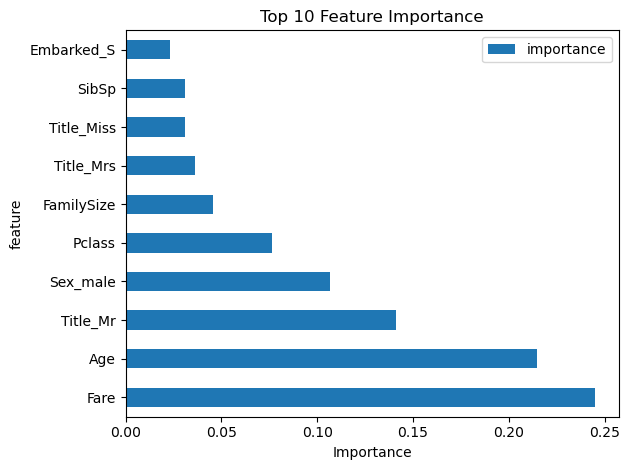

In [40]:
# Görselleştir
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(x='feature', y='importance', kind='barh')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.savefig('../figures/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()